# Part II - Airlines Delay
## by Priyangka Roy

## Investigation Overview
This presentation explores the flights dataset that reports cancelled and delayed flights in the United States with the reasons for cancellation and delays. The dataset is used from the United States Department of Transportation. 

## Dataset Overview

The dataset has 170,188 flight details with 21 features. The data ranges from the year of 2013 to 2023.

The variables in the dataset contains information about flights' origin, departure, date and time, duration, cancellation status, delay (and cause of delay), etc.

In [8]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [9]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('Airline_Delay_Cause.csv')
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,1,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",14.0,1.0,0.00,1.00,...,0.0,0.00,0.0,0.0,648.0,0.0,647.0,1.0,0.0,0.0
1,2023,1,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",82.0,10.0,6.06,1.72,...,0.0,1.74,0.0,0.0,1800.0,1393.0,272.0,56.0,0.0,79.0
2,2023,1,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",60.0,8.0,3.54,1.59,...,0.0,0.16,2.0,4.0,484.0,176.0,184.0,113.0,0.0,11.0
3,2023,1,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",26.0,6.0,3.40,1.20,...,0.0,0.76,0.0,0.0,395.0,119.0,167.0,30.0,0.0,79.0
4,2023,1,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",109.0,30.0,8.08,0.61,...,0.0,11.52,3.0,0.0,1591.0,402.0,22.0,333.0,0.0,834.0


## Total Delays by Airline

Southwest Airlines Co. had the highest total delayed flights among all airlines
 

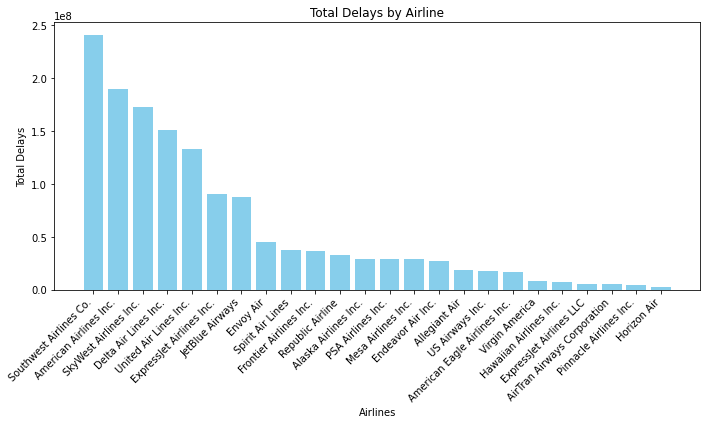

In [10]:
delay_columns = ['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
df_delays = df.groupby('carrier_name')[delay_columns].sum()

df_delays['total_delay'] = df_delays.sum(axis=1)

sorted_df = df_delays.sort_values(by='total_delay', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(sorted_df.index, sorted_df['total_delay'], color='skyblue')
plt.xlabel('Airlines')
plt.ylabel('Total Delays')
plt.title('Total Delays by Airline')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

## Distribution of Delays by Airline

Carrier `WN` had the highest delays among all `carriers` and the distribution showed that `arr_delay` is the most frequent delay types

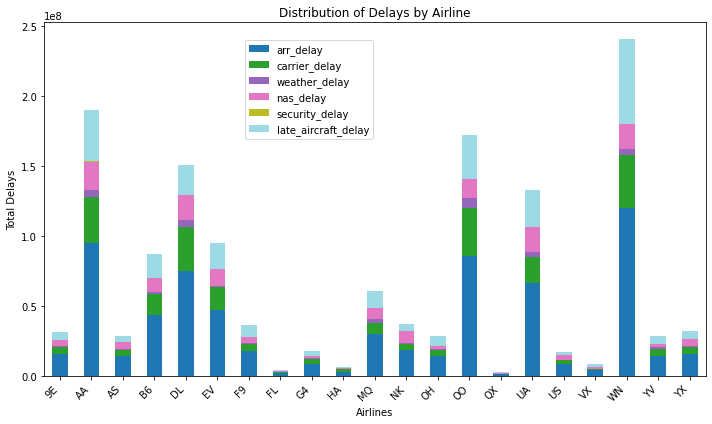

In [11]:
plt.rcParams["figure.figsize"] = (10,6)

delay_columns = ['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
df_delays = df.groupby('carrier')[delay_columns].sum()

df_delays.plot(kind='bar', stacked=True, colormap='tab20')
plt.xlabel('Airlines')
plt.ylabel('Total Delays')
plt.title('Distribution of Delays by Airline')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='center',bbox_to_anchor=(0.4, 0.81))
plt.tight_layout()
plt.show();

## Flight delay reasons and how much they contribute to the number of delayed flights
We also see that the weather is not the main reason for delays. Weather only contributes to 5.20% of the delays.



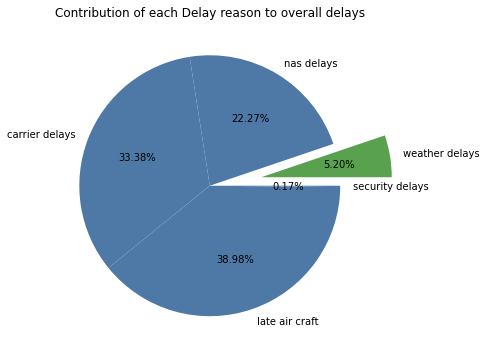

In [12]:
wethear_ct_sum= df['weather_delay'].sum()
nas_ct_sum= df['nas_delay'].sum()
carrier_ct_sum= df['carrier_delay'].sum()
security_ct_sum =df['security_delay'].sum()
late_aircraft_sum = df['late_aircraft_delay'].sum()


num_of_overall_cancelation = wethear_ct_sum+nas_ct_sum+carrier_ct_sum+security_ct_sum+late_aircraft_sum

wethear_ct_sum=(wethear_ct_sum/num_of_overall_cancelation)*100
nas_ct_sum=(nas_ct_sum/num_of_overall_cancelation)*100
carrier_ct_sum=(carrier_ct_sum/num_of_overall_cancelation)*100
security_ct_sum=(security_ct_sum/num_of_overall_cancelation)*100
late_aircraft_sum=(late_aircraft_sum/num_of_overall_cancelation)*100


X = ['weather delays' , 'nas delays','carrier delays','late air craft','security delays']
Y = [wethear_ct_sum, nas_ct_sum,carrier_ct_sum,late_aircraft_sum,security_ct_sum]
plt.pie(Y, labels=X ,colors=['#59a14f','#4e79a7','#4e79a7','#4e79a7','#4e79a7'], explode=[0.4,0,0,0,0],  autopct='%1.2f%%')
plt.title('Contribution of each Delay reason to overall delays')
plt.show()

## Flight cancelation reasons and how much they contribute to the number of canceled flights
We can clearly see that a late air craft arival is the main reason why flight get canceled and not weather or secuirity problems. Infact weather contributes with only 3.4% and secuirity cancelation contributes with only 0.2%

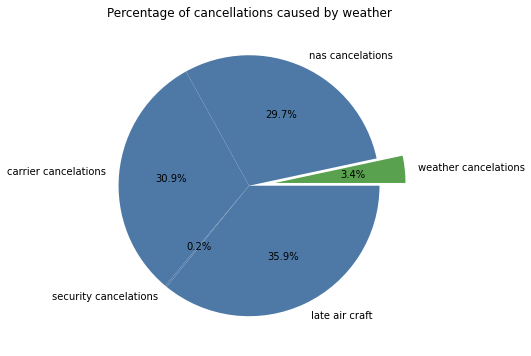

In [13]:
wethear_ct_sum= df['weather_ct'].sum()
nas_ct_sum= df['nas_ct'].sum()
carrier_ct_sum= df['carrier_ct'].sum()
security_ct_sum =df['security_ct'].sum()
late_aircraft_sum = df['late_aircraft_ct'].sum()

num_of_overall_cancelation = wethear_ct_sum+nas_ct_sum+carrier_ct_sum+security_ct_sum+late_aircraft_sum

wethear_ct_sum=(wethear_ct_sum/num_of_overall_cancelation)*100
nas_ct_sum=(nas_ct_sum/num_of_overall_cancelation)*100
carrier_ct_sum=(carrier_ct_sum/num_of_overall_cancelation)*100
security_ct_sum=(security_ct_sum/num_of_overall_cancelation)*100
late_aircraft_sum=(late_aircraft_sum/num_of_overall_cancelation)*100


X = ['weather cancelations','nas cancelations', 'carrier cancelations', 'security cancelations','late air craft']
Y = [wethear_ct_sum,nas_ct_sum,carrier_ct_sum, security_ct_sum,late_aircraft_sum]
plt.pie(Y, labels=X ,colors=['#59a14f','#4e79a7','#4e79a7','#4e79a7','#4e79a7'] , explode=[0.2,0,0,0,0], autopct='%1.1f%%')
plt.title('Percentage of cancellations caused by weather')
plt.show()

In [14]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

#!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 714806 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
^C

Interrupted
